In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pymc3
import pymc3 as pm
from pymc3 import glm
import statsmodels.api as sm
import arviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 8.1 MB/s 
     |████████████████████████████████| 1.8 MB 16.6 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=137ec3d7cc7e2baccb2be9d1c26c9c7ed6905739151820f87de1308e2391ba5c
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url1 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv"
url2 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv"

In [ ]:
dem_candidates = pd.read_csv(url1,sep=',')
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
rep_candidates = pd.read_csv(url2,sep=',',encoding = "latin-1")
rep_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
win_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "None")]
win_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * 239
lost_df1 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Lost") & (dem_candidates["Primary Runoff Status"] == "None")]
lost_df2 = dem_candidates.loc[(dem_candidates["Primary Status"] == "Advanced") & (dem_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * 564
dem_candidates_result = pd.concat([win_df, lost_df])
dem_original_with_results = dem_candidates_result.copy()
dem_candidates_result

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Final Election Result
5,Walt Maddox,AL,Governor of Alabama,Governor,Regular,6/5/18,Advanced,None,On the Ballot,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
11,Mallory Hagan,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
12,Lee Auman,AL,U.S. House Alabama District 4,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-62.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Sam Johnson,TX,U.S. House Texas District 3,Representative,Regular,3/6/18,Advanced,Lost,None,-20.709999,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Lost
734,Christine Mann,TX,U.S. House Texas District 31,Representative,Regular,3/6/18,Advanced,Lost,None,-17.379999,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Lost
742,Lillian Salerno,TX,U.S. House Texas District 32,Representative,Regular,3/6/18,Advanced,Lost,None,-4.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lost
754,Ruby Faye Woolridge,TX,U.S. House Texas District 6,Representative,Regular,3/6/18,Advanced,Lost,None,-16.030001,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Lost


In [40]:
#replicate the same process for rep_candidates
win_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "None")]
win_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Advanced")]
win_df = pd.concat([win_df1,win_df2])
win_df["Final Election Result"] = ["Won"] * win_df.shape[0]
lost_df1 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Lost") & (rep_candidates["Primary Runoff Status"] == "None")]
lost_df2 = rep_candidates.loc[(rep_candidates["Primary Status"] == "Advanced") & (rep_candidates["Primary Runoff Status"] == "Lost")]
lost_df = pd.concat([lost_df1,lost_df2])
lost_df["Final Election Result"] = ["Lost"] * lost_df.shape[0]
rep_candidates_result = pd.concat([win_df, lost_df])
rep_original_with_results = rep_candidates_result.copy()
rep_candidates_result

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,Final Election Result
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
8,Wendy Rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.40,...,NaN,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Won
10,Lea Marquez Peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.60,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Won
16,Nicolas Pierson,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Advanced,None,On the Ballot,51.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Won
17,Debbie Lesko,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,35.77,...,NaN,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Matt McCall,TX,U.S. House Texas District 21,Representative,Regular,3/6/18,Advanced,Lost,None,16.93,...,No,NaN,No,NaN,No,No,NaN,NaN,No,Lost
667,Bech Bruun,TX,U.S. House Texas District 27,Representative,Regular,3/6/18,Advanced,Lost,None,36.09,...,NaN,NaN,No,Yes,No,No,NaN,NaN,NaN,Lost
673,Carmen Maria Montiel,TX,U.S. House Texas District 29,Representative,Regular,3/6/18,Advanced,Lost,None,23.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lost
684,Bunni Pounds,TX,U.S. House Texas District 5,Representative,Regular,3/6/18,Advanced,Lost,None,21.95,...,Yes,Yes,Yes,Yes,NaN,Yes,NaN,NaN,NaN,Lost


In [41]:
cols = ['Race','Veteran?', 'LGBTQ?', 'STEM?','Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?','Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?','WFP Endorsed?', 'VoteVets Endorsed?','Final Election Result']


In [42]:
dem_candidates_result = dem_candidates_result[cols]
#dem_candidates_result = dem_candidates_result.fillna("No")
# dem_candidates_result = dem_candidates_result.replace({"Yes": 1, "No": 0})
#dem_candidates_result

In [43]:
endorsement = dem_candidates_result.iloc[: ,4:15].copy()
endorsement = endorsement.fillna("No")
endorsement

,Party Support?,Emily Endorsed?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?
5,No,No,No,No,No,No,No,No,No,No,No
7,No,No,No,No,No,No,No,No,No,No,No
9,No,No,No,No,No,No,No,No,No,No,No
11,No,No,No,No,No,No,No,No,No,No,No
12,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
733,No,No,No,No,No,No,No,No,No,No,No
734,No,No,No,No,No,Yes,No,No,No,No,No
742,No,Yes,No,No,No,No,No,No,No,No,No
754,No,No,No,No,No,No,No,No,No,No,No


In [44]:
endorsement_no_count = []
for i in range(11):
  endorsement_no_count.append(sum(endorsement.iloc[:,i] == "No"))
endorsement_no_count

[764, 749, 793, 798, 794, 718, 753, 788, 757, 773, 775]

In [45]:
endorsement_yes_count = []
for i in range(11):
  endorsement_yes_count.append(sum(endorsement.iloc[:,i] == "Yes"))
endorsement_yes_count

[39, 54, 10, 5, 9, 85, 50, 15, 46, 30, 28]

In [46]:

endorsement_percent_yes = []
for i in range(11):
  temp = endorsement_yes_count[i]
  endorsement_percent_yes.append(float(temp/803 * 100))
endorsement_percent_yes

[4.85678704856787,
 6.724782067247821,
 1.2453300124533,
 0.62266500622665,
 1.1207970112079702,
 10.585305105853053,
 6.226650062266501,
 1.86799501867995,
 5.72851805728518,
 3.7359900373599,
 3.4869240348692405]

In [47]:
endorse_col = endorsement.columns
endorse_percent_df = pd.DataFrame({
    "Type of Endorsement" : endorse_col,
    "Endorsement Yes Percent": np.round(endorsement_percent_yes,1)
})
endorse_percent_df = endorse_percent_df.sort_values("Endorsement Yes Percent")
endorse_percent_df

,Type of Endorsement,Endorsement Yes Percent
3,Warren Endorsed?,0.6
4,Sanders Endorsed?,1.1
2,Biden Endorsed?,1.2
7,PCCC Endorsed?,1.9
10,VoteVets Endorsed?,3.5
9,WFP Endorsed?,3.7
0,Party Support?,4.9
8,Indivisible Endorsed?,5.7
6,Justice Dems Endorsed?,6.2
1,Emily Endorsed?,6.7


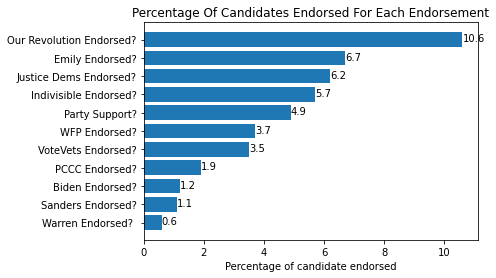

In [48]:
fig, ax = plt.subplots()
bars = ax.barh(y = endorse_percent_df['Type of Endorsement'], width = endorse_percent_df['Endorsement Yes Percent'])
for i, v in enumerate(endorse_percent_df['Endorsement Yes Percent']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of candidate endorsed")
plt.title("Percentage Of Candidates Endorsed For Each Endorsement");

In [49]:
plot_2_df = dem_candidates_result[['Race', 'Veteran?', 'LGBTQ?', 'STEM?','Final Election Result']]
# drop rows with Null values for identities
plot_2_df = plot_2_df.dropna()
plot_2_df

,Race,Veteran?,LGBTQ?,STEM?,Final Election Result
5,White,No,No,No,Won
7,Nonwhite,Yes,No,No,Won
9,White,No,No,No,Won
11,White,No,No,No,Won
12,White,No,No,No,Won
...,...,...,...,...,...
733,White,No,No,No,Lost
734,White,No,No,Yes,Lost
742,White,No,No,No,Lost
754,Nonwhite,No,No,No,Lost


In [50]:
white_won = len(plot_2_df[(plot_2_df['Race']=='White')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='White'])
nonwhite_won = len(plot_2_df[(plot_2_df['Race']=='Nonwhite')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Race']=='Nonwhite'])
veteran_won = len(plot_2_df[(plot_2_df['Veteran?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='Yes'])
not_veteran_won =len(plot_2_df[(plot_2_df['Veteran?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['Veteran?']=='No'])
lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='Yes'])
not_lgbtq_won = len(plot_2_df[(plot_2_df['LGBTQ?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['LGBTQ?']=='No'])
stem_won = len(plot_2_df[(plot_2_df['STEM?']=='Yes')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='Yes'])
not_stem_won = len(plot_2_df[(plot_2_df['STEM?']=='No')&(plot_2_df['Final Election Result']=='Won')])/len(plot_2_df[plot_2_df['STEM?']=='No'])

In [51]:
identity = np.array(['white', 'nonwhite', 'veteran', 'not_veteran', 'LGBTQ', 'not_LGBTQ', 'STEM', 'not_STEM'])
prop_won = np.array([white_won, nonwhite_won, veteran_won, not_veteran_won, lgbtq_won, not_lgbtq_won, stem_won, not_stem_won])
identity_percent_df = pd.DataFrame({
    "Identity Type" : identity,
    "Percent Won": np.round(prop_won*100,1)
})
identity_percent_df = identity_percent_df.sort_values("Percent Won")


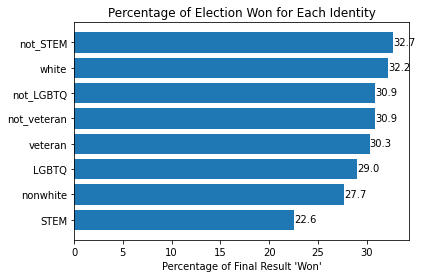

In [52]:
fig, ax = plt.subplots()
bars = ax.barh(y = identity_percent_df['Identity Type'], width = identity_percent_df['Percent Won'])
for i, v in enumerate(identity_percent_df['Percent Won']):
    ax.text(v, i-0.1, str(v), color='black', fontdict=dict(fontsize=10))
plt.xlabel("Percentage of Final Result 'Won'")
plt.title("Percentage of Election Won for Each Identity");

In [53]:
race_result = plot_2_df[["Race", "Final Election Result"]]
race_result

,Race,Final Election Result
5,White,Won
7,Nonwhite,Won
9,White,Won
11,White,Won
12,White,Won
...,...,...
733,White,Lost
734,White,Lost
742,White,Lost
754,Nonwhite,Lost


In [54]:
result_by_categories = race_result.groupby(["Final Election Result","Race"]).size()
result_by_categories.to_frame()

0
Final Election Result Race         
Lost                  Nonwhite  146
                      White     306
Won                   Nonwhite   56
                      White     145

In [55]:
result_by_categories = race_result.pivot(values = ["Final Election Result","Race"], columns = "Race").count()
result_by_categories

                       Race    
Final Election Result  Nonwhite    202
                       White       451
Race                   Nonwhite    202
                       White       451
dtype: int64

# **GLM Q1**

Frequentist and Baysian Model Code

In [56]:
dem_candidates_result = dem_candidates_result.fillna("No")
dem_candidates_result = dem_candidates_result.replace({"Yes": 1, "No": 0})
dem_candidates_result = dem_candidates_result.replace({"White": 1, "Nonwhite": 0})
dem_candidates_result = dem_candidates_result.replace({"Won": 1, "Lost": 0})
dem_candidates_result.head()

,Race,Veteran?,LGBTQ?,STEM?,Party Support?,Emily Endorsed?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,Final Election Result
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed', 'FinalElectionResult']
dem_candidates_result.columns = cols
dem_candidates_result.columns

Index(['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport', 'EmilyEndorsed',
       'BidenEndorsed', 'WarrenEndorsed', 'SandersEndorsed',
       'OurRevolutionEndorsed', 'JusticeDemsEndorsed', 'PCCCEndorsed',
       'IndivisibleEndorsed', 'WFPEndorsed', 'VoteVetsEndorsed',
       'FinalElectionResult'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dem_candidates_result, test_size=0.2, random_state=200)
X_cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed'] 
y_col = ["FinalElectionResult"]



X = train[X_cols]
y = train[y_col]
train

,Race,Veteran,LGBTQ,STEM,PartySupport,EmilyEndorsed,BidenEndorsed,WarrenEndorsed,SandersEndorsed,OurRevolutionEndorsed,JusticeDemsEndorsed,PCCCEndorsed,IndivisibleEndorsed,WFPEndorsed,VoteVetsEndorsed,FinalElectionResult
769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
225,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
772,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
662,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# build GLM model 
import statsmodels.api as sm

reg = sm.GLM.from_formula('FinalElectionResult ~ Race + Veteran + LGBTQ + STEM + PartySupport + EmilyEndorsed + BidenEndorsed + WarrenEndorsed + SandersEndorsed + OurRevolutionEndorsed + JusticeDemsEndorsed + PCCCEndorsed + IndivisibleEndorsed + WFPEndorsed + VoteVetsEndorsed',data = train, family=sm.families.Binomial()).fit()

print(reg.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     FinalElectionResult   No. Observations:                  642
Model:                             GLM   Df Residuals:                      626
Model Family:                 Binomial   Df Model:                           15
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -334.49
Date:                 Sun, 11 Dec 2022   Deviance:                       668.97
Time:                         01:05:46   Pearson chi2:                     638.
No. Iterations:                     22                                         
Covariance Type:             nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

In [60]:
train["y_pred"] = reg.predict(train)
train["y_pred"] = np.round(train["y_pred"]).astype(int)
test["y_pred"] = reg.predict(test)
test["y_pred"] = np.round(test["y_pred"]).astype(int)

In [61]:
train_rmse = np.mean((train["y_pred"] - train["FinalElectionResult"]) ** 2) ** 0.5
test_rmse = np.mean((test["y_pred"] - test["FinalElectionResult"]) ** 2) ** 0.5
print("Training set error for GLM model:", train_rmse)
print("Test set error for GLM model:", test_rmse)

Training set error for GLM model: 0.48175432267321716
Test set error for GLM model: 0.4662524041201569


In [62]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(train["FinalElectionResult"],train["y_pred"])
test_accuracy = accuracy_score(test["FinalElectionResult"],test["y_pred"])
print("Training set Accuracy for GLM model:", train_accuracy)
print("Test set Accuracy for GLM model:", test_accuracy)

Training set Accuracy for GLM model: 0.7679127725856698
Test set Accuracy for GLM model: 0.782608695652174


In [63]:
equation = 'FinalElectionResult ~ Race + Veteran + LGBTQ + STEM + PartySupport + EmilyEndorsed + BidenEndorsed + WarrenEndorsed + SandersEndorsed + OurRevolutionEndorsed + JusticeDemsEndorsed + PCCCEndorsed + IndivisibleEndorsed + WFPEndorsed + VoteVetsEndorsed'
with pm.Model() as model:
    glm.GLM.from_formula(equation,data = train, family=glm.families.Binomial())
    train_trace = pm.sample(1000,cores=2, target_accept=0.95, return_inferencedata=True)

We recommend to instead use Bambi https://bambinos.github.io/bambi/


ERROR:pymc3:There were 896 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 844 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0838f7ee0>,
      dtype=object)

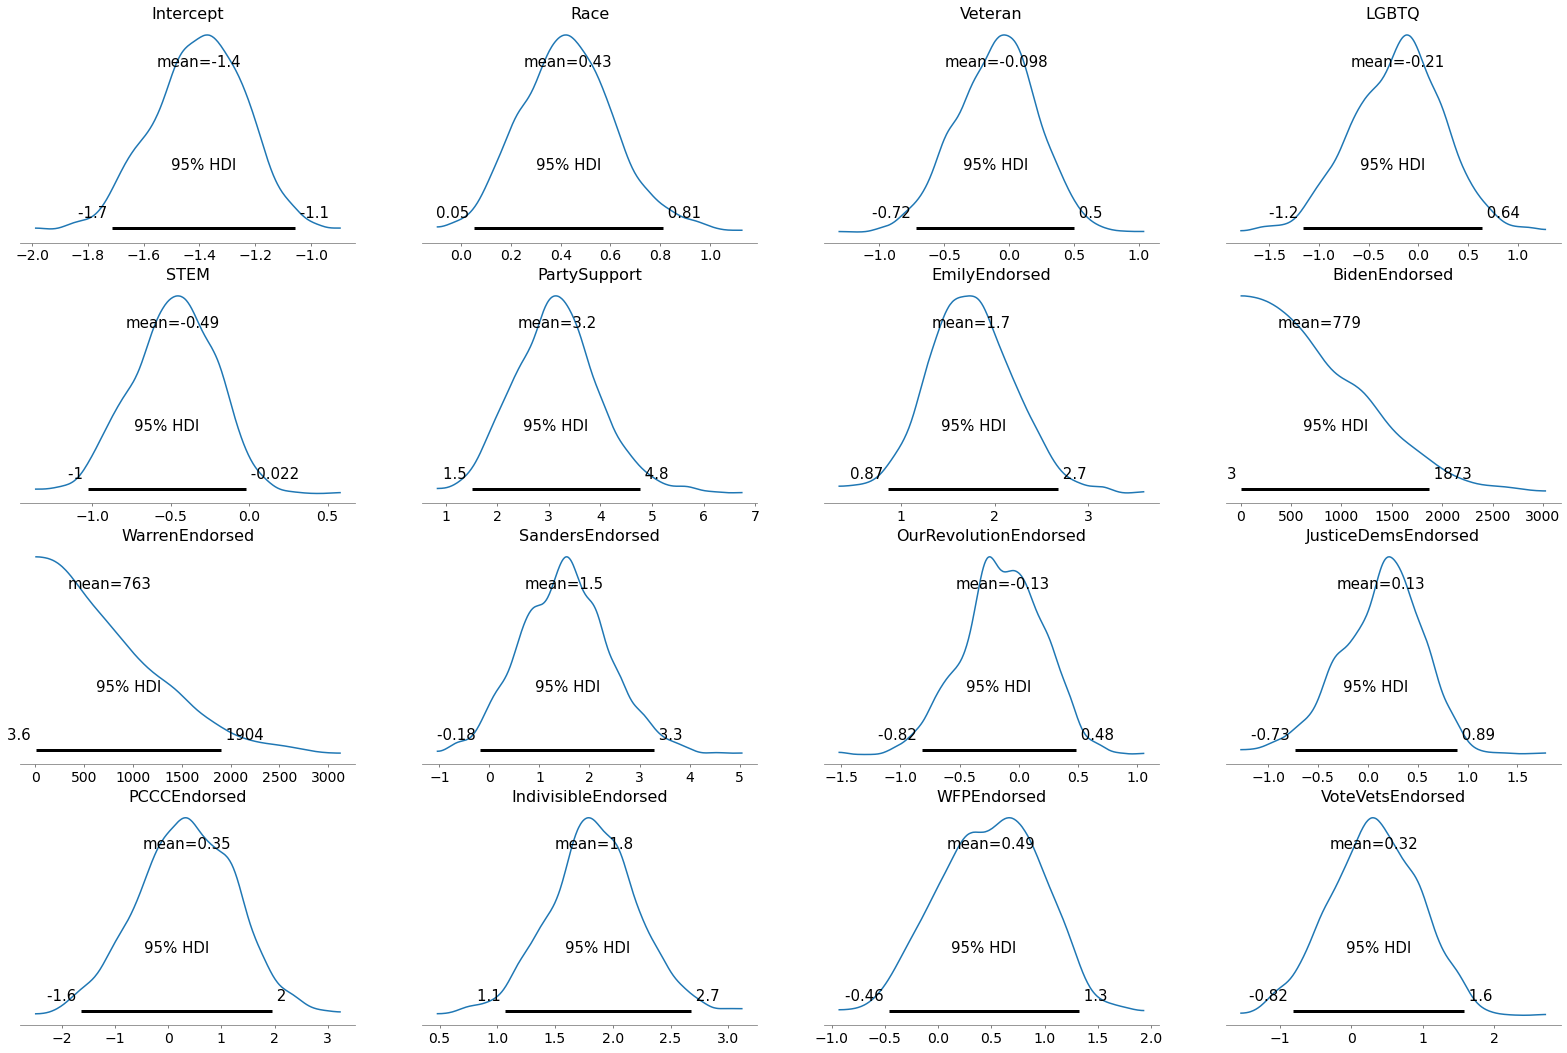

In [64]:
arviz.plot_posterior(train_trace,hdi_prob=0.95)

In [ ]:

ppc_test = pm.sample_posterior_predictive(train_trace, model=model, samples=100)
ppc_test

y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
np.mean((y_test_pred - train["FinalElectionResult"]) ** 2) ** 0.5

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


0.48175432267321716

In [ ]:
y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
accuracy_score(train["FinalElectionResult"],y_test_pred)

0.7679127725856698

In [ ]:
equation = 'FinalElectionResult ~ Race + Veteran + LGBTQ + STEM + PartySupport + EmilyEndorsed + BidenEndorsed + WarrenEndorsed + SandersEndorsed + OurRevolutionEndorsed + JusticeDemsEndorsed + PCCCEndorsed + IndivisibleEndorsed + WFPEndorsed + VoteVetsEndorsed'
with pm.Model() as model:
    glm.GLM.from_formula(equation,data = test, family=glm.families.Binomial())
    test_trace = pm.sample(1000,cores=2, target_accept=0.95, return_inferencedata=True)

We recommend to instead use Bambi https://bambinos.github.io/bambi/


ERROR:pymc3:There were 495 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
arviz.plot_posterior(test_trace,hdi_prob=0.95)

In [ ]:
ppc_test = pm.sample_posterior_predictive(train_trace, model=model, samples=100)
ppc_test

y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
np.mean((y_test_pred - test["FinalElectionResult"]) ** 2) ** 0.5

In [ ]:
y_test_pred = np.round(ppc_test["y"].mean(axis=0)).astype(int)
accuracy_score(test["FinalElectionResult"],y_test_pred)

Nonparametric Method - Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_cols = ['Race', 'Veteran', 'LGBTQ', 'STEM', 'PartySupport',
       'EmilyEndorsed', 'BidenEndorsed', 'WarrenEndorsed',
       'SandersEndorsed', 'OurRevolutionEndorsed',
       'JusticeDemsEndorsed', 'PCCCEndorsed', 'IndivisibleEndorsed',
       'WFPEndorsed', 'VoteVetsEndorsed'] 
y_col = ["FinalElectionResult"]



X = train[X_cols]
y = train[y_col]
rf =  RandomForestClassifier().fit(X, y)

train_X = train[X_cols]
train_y = rf.predict(train_X)
train['y_pred'] = train_y

test_X = test[X_cols]
test_y = rf.predict(test_X)
test['y_pred'] = test_y

train_rmse = np.mean((train["y_pred"] - train["FinalElectionResult"]) ** 2) ** 0.5
test_rmse = np.mean((test["y_pred"] - test["FinalElectionResult"]) ** 2) ** 0.5

print("Training set error for Random Forest model:", train_rmse)
print("Test set error for Random Forest model:    ", test_rmse)

In [ ]:

train_accuracy = accuracy_score(train["FinalElectionResult"],train_y)
test_accuracy = accuracy_score(test["FinalElectionResult"],test_y)
print("Training set Accuracy for Random Forest model:", train_accuracy)
print("Test set Accuracy for Random Forest model:    ", test_accuracy)

## RQ2

In [ ]:
disbursement = pd.read_csv("/content/drive/My Drive/data 102/candidate_summary_2018.csv")
disbursement

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.00,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.00,01/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,https://www.fec.gov/data/candidate/S8AL00340/?...,"MOORE, ROY JUDGE",S8AL00340,S,AL,0.0,REP,CHALLENGER,5147650.00,5059697.00,...,49480.00,0.0,10000.0,59480.00,0.00,5083692.00,4995739.00,0.00,0.00,04/01/2017
3789,https://www.fec.gov/data/candidate/H6OR04203/?...,"PERKINS, JO RAE",H6OR04203,H,OR,4.0,REP,CHALLENGER,14623.38,14464.30,...,0.00,0.0,0.0,0.00,144.10,8735.04,14225.20,21.90,0.00,01/01/2017
3790,https://www.fec.gov/data/candidate/H6NV01232/?...,"D'SILVA, REUBEN",H6NV01232,H,NV,1.0,DEM,CHALLENGER,90878.09,82884.55,...,682.85,0.0,0.0,682.85,552.01,89812.39,80898.68,956.20,552.01,01/01/2017
3791,https://www.fec.gov/data/candidate/H8PA18181/?...,"LAMB, CONOR",H8PA18181,H,PA,17.0,DEM,INCUMBENT,9145124.54,8898568.71,...,104688.54,0.0,5500.0,110188.54,44886.99,8768697.23,8718422.04,0.00,0.00,10/01/2017


Merge disbursement & rep_candidates, & dem_original_with_results. Columns shared are: Cand_name, candidate.

1. Lower case all name, replace the commas in Cand_name with space
2. match on similarity > 90, preserving all disbursement columns, Final Election Result
3.


In [ ]:
dem_original_with_results['Candidate'] = dem_original_with_results['Candidate'].str.lower()
rep_candidates['Candidate'] = rep_candidates['Candidate'].str.lower()

In [ ]:
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.lower()
disbursement['Cand_Name'] = disbursement['Cand_Name'].str.replace(',', '')

In [ ]:
disbursement.head(5)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ashby ken,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,eckhart don elijah,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,ziesing michael vincent,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,sires albio,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,smith douglas mark mr. jr.,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017


In [ ]:
# My assumption: the first word is the last name, remaining part is first & middle name
last_name, first_middle_name = [], []
for lst in disbursement['Cand_Name'].str.split(" "): 
    last_name.append(lst[0])
    first_middle_name.append(lst[1:])

for name_ind in range(len(first_middle_name)):
    length = len(first_middle_name[name_ind])
    temp = ''
    for i in range(length - 1):
        temp = temp + first_middle_name[name_ind][i] + ' '
    temp = temp + first_middle_name[name_ind][length - 1]
first_middle_name[name_ind] = temp

In [ ]:
res = []
for i in range(len(last_name)):
    res.append(' '.join(first_middle_name[i]) + ' '+ last_name[i])

The cell below will overwrite the previous two cell. By using only first + last name, it would reduce redundant matching from rapidfuzz

In [ ]:
#UP TO DATE VERSION! feature engineering version: Do not consider middle name
last_name, first_name = [], []
for lst in disbursement['Cand_Name'].str.split(" "): 
    last_name.append(lst[0])
    first_name.append(lst[1])
res = []
for i in range(len(last_name)):
    res.append(first_name[i] + " " + last_name[i])

In [ ]:
# Changed the order in Cand_name to be: first_middle_name + last_name
#candidates = list(zip(first_middle_name, last_name))
#res = []
#for ppl in candidates:
    #res.append(' '.join(ppl))
#res[0:5]

In [ ]:
disbursement['Cand_Name'] = res

In [ ]:
disbursement.head(10)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ken ashby,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,don eckhart,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,michael ziesing,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,albio sires,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,douglas smith,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.0,01/01/2017
5,https://www.fec.gov/data/candidate/H4CA42078/?...,boyd roberts,H4CA42078,H,CA,48.0,DEM,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
6,https://www.fec.gov/data/candidate/H8NJ07207/?...,lindsay brown,H8NJ07207,H,NJ,7.0,REP,CHALLENGER,4365.06,7357.50,...,0.00,0.0,0.0,0.00,0.00,4365.06,7357.50,0.00,0.0,02/18/2017
7,https://www.fec.gov/data/candidate/H8IL18092/?...,brian deters,H8IL18092,H,IL,18.0,DEM,CHALLENGER,20583.09,19770.32,...,100.00,0.0,0.0,100.00,0.00,20483.09,19670.32,0.00,0.0,09/03/2017
8,https://www.fec.gov/data/candidate/H8KS02173/?...,paul davis,H8KS02173,H,KS,2.0,DEM,OPEN,3985402.56,3954361.15,...,8147.53,0.0,0.0,8147.53,0.00,3538916.98,3926569.14,0.00,0.0,07/01/2017
9,https://www.fec.gov/data/candidate/H8MO02232/?...,john messmer,H8MO02232,H,MO,2.0,DEM,CHALLENGER,14657.22,14657.22,...,0.00,0.0,0.0,0.00,0.00,10258.00,14448.81,0.00,0.0,08/01/2017


In [ ]:
dem_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "DEM"]
dem_disbursement = dem_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
dem_disbursement = dem_disbursement.reset_index().drop("index", axis = 1)
dem_disbursement.head()

,Cand_Name,Total_Receipt,Total_Disbursement,Exempt_Legal_Accounting_Disbursement,Fundraising_Disbursement,Other_Disbursements
0,albio sires,460108.57,596546.56,0.0,0.0,98504.05
1,boyd roberts,0.00,0.00,0.0,0.0,0.00
2,brian deters,20583.09,19770.32,0.0,0.0,0.00
3,paul davis,3985402.56,3954361.15,0.0,0.0,0.00
4,john messmer,14657.22,14657.22,0.0,0.0,0.00


In [ ]:
disbursement.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,ken ashby,H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,don eckhart,S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,michael ziesing,S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,albio sires,H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,douglas smith,H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017


In [ ]:
pip install rapidfuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 36.6 MB/s 


In [ ]:
import rapidfuzz
from rapidfuzz import process, utils as fuzz_utils

In [ ]:
def fuzzy_merge(baseFrame, compareFrame, baseKey, compareKey, threshold=80, limit=1, how='left'):
    s_mapping = {x: fuzz_utils.default_process(x) for x in compareFrame[compareKey]}

    m1 = baseFrame[baseKey].apply(lambda x: process.extract(
      fuzz_utils.default_process(x), s_mapping, limit=limit, score_cutoff=threshold, processor=None
    ))
    baseFrame['Match'] = m1

    m2 = baseFrame['Match'].apply(lambda x: ', '.join(i[2] for i in x))
    baseFrame['organisations'] = m2.replace("",np.nan)

    return baseFrame.merge(compareFrame, left_on='organisations', right_on=compareKey, how=how)

In [ ]:
fuzzy_merge(dem_disbursement, dem_original_with_results, 'Cand_Name', 'Candidate')

In [ ]:
# check accuracy
output = fuzzy_merge(dem_disbursement, dem_original_with_results, 'Cand_Name', 'Candidate')
output[['Cand_Name', 'Match', 'Candidate']].head(20)

In [ ]:
#check cell: proportion of null values
output['Candidate'].isna().sum() / output.shape[0]

In [ ]:
 output.shape[0] * (1-0.4176334106728538)

In [ ]:
output_dem = output[output.Candidate.notnull()]
output_dem['political_affiliation'] = ['dem'] * output_dem.shape[0]

In [ ]:
rep_disbursement = disbursement[disbursement["Cand_Party_Affiliation"] == "REP"]
rep_disbursement = rep_disbursement[['Cand_Name', 'Total_Receipt', 'Total_Disbursement', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Other_Disbursements']]
rep_disbursement = rep_disbursement.reset_index().drop("index", axis = 1)
rep_disbursement.head()

In [ ]:
output = fuzzy_merge(rep_disbursement, rep_original_with_results, 'Cand_Name', 'Candidate')

In [ ]:
output['Candidate'].isna().sum() / output.shape[0]

In [ ]:
output.shape[0] * (1-0.35802469135802467)

In [ ]:
output_rep = output[output.Candidate.notnull()]
output_rep['political_affiliation'] = ['rep'] * output_rep.shape[0]

In [ ]:
output_dem.head(5)

In [ ]:
col = ['Candidate', 'Total_Receipt', 'Total_Disbursement','Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement','Other_Disbursements',
       'State', 'Final Election Result', 'political_affiliation']

output_dem = output_dem[col]
output_rep = output_rep[col]

In [ ]:
output_rep.columns == output_dem.columns

In [ ]:
match = pd.concat([output_dem, output_rep], ignore_index=True)

In [ ]:
# paul davis appearing twice
match.head()

In [ ]:
median = np.median(match['Total_Disbursement'].values)
q3 = np.percentile(match['Total_Disbursement'].values, 75)
q1 = np.percentile(match['Total_Disbursement'].values, 25)
threshold = q3 + 1.5 * (q3 - q1)

In [ ]:
outlier_match = match[match['Total_Disbursement'] > threshold]
outlier_match.head()

In [ ]:
no_outlier = match[match['Total_Disbursement'] < threshold]

In [ ]:
plt.figure(figsize=(12,8));
plt.ticklabel_format(style='plain');
sns.boxplot(data = no_outlier, x = 'Final Election Result', y = 'Total_Disbursement', hue = 'political_affiliation');
plt.legend(loc="upper right", frameon=True, fontsize=12);
plt.title('Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result');

In [ ]:
# Do not separate political affiliation
plt.figure(figsize=(12,8));
plt.ticklabel_format(style='plain');
sns.boxplot(data = no_outlier, x = 'Final Election Result', y = 'Total_Disbursement');
plt.legend(loc="upper right", frameon=True, fontsize=12);
plt.title('Total Disbursement of Democratic and Republican Candidates Based on Their Final Election Result');

In [ ]:
match.columns

In [ ]:
no_outlier.head(5)

In [ ]:
# Exempt_Legal_Accounting_Disbursement & Fundraising_Disbursement are all 0, if outliers included, there are a few nonzero values
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Other_Disbursements', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Other disbursement amount of Democratic and Republican candidates V.S their Total disbursement');

In [ ]:
# Exempt_Legal_Accounting_Disbursement & Fundraising_Disbursement are all 0, if outliers included, there are a few nonzero values
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
sns.scatterplot(data = no_outlier, x ='Total_Receipt', y= 'Total_Disbursement', hue = 'political_affiliation');
plt.title('Total receipt V.S Total Disbursement of Democratic and Republican Candidates');

In [ ]:
plt.figure(figsize=(6,4));
plt.ticklabel_format(style='plain');
plt.scatter(no_outlier['Fundraising_Disbursement'], no_outlier['Exempt_Legal_Accounting_Disbursement']);

In [ ]:
np.max(no_outlier['Fundraising_Disbursement'].values)

In [ ]:
no_outlier

In [ ]:
rep_original_with_results.columns

In [ ]:
list1 = disbursement["Cand_Name"].tolist()
list2 = dem_original_with_results["Candidate"].tolist()

In [ ]:
import difflib 
difflib.get_close_matches

In [ ]:
#may take half a minute, default threshold in difflib.get_close_matches = 0.6
disbursement['match'] =disbursement["Cand_Name"].apply(lambda x: (difflib.get_close_matches(x, dem_original_with_results["Candidate"])[:1] or [None])[0])
disbursement.head()


In [ ]:
# check accuracy
check = disbursement[disbursement["Cand_Party_Affiliation"] == "DEM"]
check[['Cand_Name', 'match']].head(20)

In [ ]:
#check proportion of null value with threshold 0.6, using difflib
check['match'].isna().sum()/ check.shape[0]